In [337]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from openpyxl import load_workbook
import matplotlib.ticker as mtick

## Read inputs

In [338]:
path = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\raw\H2_supply_route_assessment.xlsx'
path_plt = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\Plots'
path_csv = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\processed'

In [339]:
#Definition of variables for pipeline transport costs
tea_pipe = pd.read_excel(path, sheet_name='Pipeline Transport', decimal=',', index_col=0)
tea_pipe

,Parameter,Reference,2020
ID,,,
Discount rate [%],0.05,NaN,NaN
Offshore Capex cost factor,1.7,EHB 2022; IRENA 2022,NaN
Pipeline Opex [€/a as % of Capex],0.017,NaN,NaN
Compressor Opex [€/a as % of Capex],0.009,NaN,NaN
Low - Compression capacity @ 48inch [MW_el/1000km],190,EHB 2020,NaN
...,...,...,...
High - retrofit Offshore (EHB 2022) Capex Compression [€/kg/1000km],1.06,NaN,NaN
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN


In [340]:
tra_d = pd.read_excel(path, sheet_name='Transport Distances', decimal=',')
tra_d

,Origin_Country,Destination_Country,sea distance (km),onshore distance (km),offshore distance (km),Starting point
0,United Arab Emirates,Germany,12443.10,NaN,NaN,NaN
1,Angola,Germany,9809.65,NaN,NaN,NaN
2,Argentina,Germany,14063.90,NaN,NaN,NaN
3,Austria,Germany,6005.96,500.0,0.0,NaN
4,Australia,Germany,21212.10,NaN,NaN,NaN
...,...,...,...,...,...,...
955,Philippines,China,1782.35,NaN,NaN,NaN
956,Iceland,China,20454.60,NaN,NaN,NaN
957,Papua New Guinea,China,6298.52,NaN,NaN,NaN
958,Cameroon,China,19717.70,NaN,NaN,NaN


In [341]:
el_price = pd.read_excel(path, sheet_name= 'Commodity Prices', index_col=0, decimal=',')
el_price

,Reference,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Electricity prices in Germany [€_2020/MWh],NaN,NaN,NaN,512.000000,104.000000,NaN,150.000000,133.200000,116.40000,99.600000,...,56.30000,55.60000,54.900000,54.20000,53.50000,52.800000,52.100000,51.400000,50.700000,50.000000
Electricity prices in Norway [€_2018/MWh],DNV Gl 2018,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.11822,45.738344,...,49.60933,50.70543,51.925184,53.19331,54.22122,54.704721,54.535295,53.994557,53.715329,53.994428
Electricity prices in Norway [€_2021/MWh],LMA 2021,31.000000,31.800000,32.600000,33.400000,34.200000,35.000000,39.400000,43.80000,48.200000,...,56.80000,54.60000,52.400000,50.20000,48.00000,45.800000,43.600000,41.400000,39.200000,37.000000
EU ETS [€_2020/t_CO2],NaN,25.000000,NaN,80.000000,NaN,NaN,88.000000,94.400000,100.80000,107.200000,...,194.20000,198.40000,202.600000,206.80000,211.00000,215.000000,219.000000,223.000000,227.000000,231.000000
CO2 prices global [USD_2021/t CO2],IEA WOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.000000
Gas prices in Germany [€_2020/MWh],NaN,13.000000,12.000000,150.000000,300.000000,150.000000,70.000000,60.000000,50.00000,35.000000,...,35.00000,35.00000,35.000000,35.00000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000
Gas prices in Canada [€_2020/MWh],https://www2.deloitte.com/content/dam/Deloitte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gas prices EU USD_2021/MWh,IEA WOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800000


# Pipeline

In [342]:
# WACC for all transport investments (pipelines, terminals, liquefaction plants)
i_tra = float(tea_pipe.loc['Discount rate [%]']['Parameter'])
i_tra

# Economic lifetime for pipelines
l_pipe = float(tea_pipe.loc['Lifetime [Years]']['Parameter'])
l_pipe
# Amortisation factor for onshore pipelines
alpha = (i_tra * (1 + i_tra) ** l_pipe) / (((1 + i_tra) ** l_pipe) - 1)
alpha
# Utilisation of the pipeline in %
pipe_use = float(tea_pipe.loc['Pipeline load factor [%]']['Parameter'])
pipe_use
# Pipeline Opex [€/a as % of Capex]
pipe_opex_share = float(tea_pipe.loc['Pipeline Opex [€/a as % of Capex]']['Parameter'])
pipe_opex_share
# Compression Opex [€/a as % of Capex]
comp_opex_share = float(tea_pipe.loc['Compressor Opex [€/a as % of Capex]']['Parameter'])
comp_opex_share
# New pipeline


0.009

## New offshore pipeline

In [343]:
# Pipeline capex offshore new [€/kg/1000km]
capex_pipe_new_off_EHB = float(
    tea_pipe.loc['Medium - New Offshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_new_off_EHB
# Compression capex offshore new [€/kg/1000km]
capex_comp_new_off_EHB = float(
    tea_pipe.loc['Medium - New Offshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_new_off_EHB
capex_new_off = capex_pipe_new_off_EHB + capex_comp_new_off_EHB
capex_new_off
opex_new_off = capex_pipe_new_off_EHB * pipe_opex_share + capex_comp_new_off_EHB * comp_opex_share
opex_new_off
# Onshore pipeline distance between two countries [km]
d_on = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')][
                 'onshore distance (km)'].values)
d_on
#not used here
off_factor = float(tea_pipe.loc['Offshore Capex cost factor ']['Parameter'])
off_factor
# Offshore pipeline distance between two countries [km]
d_off = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')][
                  'offshore distance (km)'].values)
d_off

650.0

### Electricity cost of compression

In [344]:
# Compression capacity in [MWel/1000km]
capa_comp = float(tea_pipe.loc['Medium - Compression capacity @ 48inch [MW_el/1000km]']['Parameter'])
capa_comp
# Load factor in hours/day
lf_comp = float(tea_pipe.loc['Assumed load factor for compressor electricity consumption [h/a]']['Parameter'])
lf_comp
#Capacity at full load factor [kg H2/a]
capa_pipe = float(tea_pipe.loc['Capacity at full load factor [kg H2/a]']['Parameter'])
capa_pipe
# Electricity cost for compression [€/kg/1000km]
comp_el_cost = capa_comp * pipe_use * 8760 * p_el_y / capa_pipe
comp_el_cost

0.02849715

## Calc. offshore new pipeline cost

In [345]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_off_pipe_new():

    result = ((alpha * capex_new_off / pipe_use + opex_new_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off / 1000

    return result

In [346]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['New_Pipeline_costs_off'])
result.index.name = 'Years'

for year in years:
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    result.New_Pipeline_costs_off.loc[year] = calculate_off_pipe_new()

result

,New_Pipeline_costs_off
Years,
2025,0.36659
2026,0.36802
2027,0.36945
2028,0.37088
2029,0.37231
2030,0.37374
2031,0.373804
2032,0.373869
2033,0.373934


In [347]:
New_Pipeline_costs_off = result

## Sensitivity

In [348]:
year = 2030
p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

In [379]:
sensitivity = []

def calculate_off_pipe_retrofit_sensi():
    for x in range (21):
        factor = x/10

        result = (((alpha * capex_retrofit_off / pipe_use + opex_retrofit_off) + (capa_comp * pipe_use * 8760 * p_el_y * factor/ capa_pipe)) * d_off) / 1000

        sensitivity.append(result)

    return sensitivity

In [380]:
calculate_off_pipe_retrofit_sensi()

[0.09051807389647931,
 0.09237038864647931,
 0.09422270339647931,
 0.09607501814647933,
 0.09792733289647931,
 0.0997796476464793,
 0.10163196239647931,
 0.1034842771464793,
 0.1053365918964793,
 0.10718890664647931,
 0.10904122139647932,
 0.1108935361464793,
 0.11274585089647932,
 0.11459816564647932,
 0.1164504803964793,
 0.11830279514647933,
 0.1201551098964793,
 0.1220074246464793,
 0.12385973939647932,
 0.1257120541464793,
 0.12756436889647932]

In [381]:
retro_pipe_sensi_P_el = pd.DataFrame(sensitivity, range(21), columns=['Retrofit pipeline transport costs [€/kg H2]'])
retro_pipe_sensi_P_el.index.name = 'Change in %'
retro_pipe_sensi_P_el

,Retrofit pipeline transport costs [€/kg H2]
Change in %,
0,0.090518
1,0.092370
2,0.094223
3,0.096075
4,0.097927
5,0.099780
6,0.101632
7,0.103484
8,0.105337


In [382]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'retro_pipe_sensi_P_el.csv')
retro_pipe_sensi_P_el.to_csv(output_file, sep=';')

### Transport distance sensi

In [353]:
transport_distance = np.arange(0,10001, 500)
sensitivity = []
def calculate_off_pipe_retrofit_sensi_distance():
    for d_off in transport_distance:

        result = (((alpha * capex_retrofit_off / pipe_use + opex_retrofit_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off) / 1000

        sensitivity.append(result)

    return sensitivity

In [354]:
calculate_off_pipe_retrofit_sensi_distance()

[0.0,
 0.0838778626126764,
 0.1677557252253528,
 0.2516335878380292,
 0.3355114504507056,
 0.41938931306338195,
 0.5032671756760584,
 0.5871450382887348,
 0.6710229009014111,
 0.7549007635140875,
 0.8387786261267639,
 0.9226564887394403,
 1.0065343513521168,
 1.0904122139647932,
 1.1742900765774695,
 1.258167939190146,
 1.3420458018028223,
 1.4259236644154987,
 1.509801527028175,
 1.5936793896408514,
 1.6775572522535278]

In [355]:
retro_pipe_sensi_distance = pd.DataFrame(sensitivity, transport_distance, columns=['Retrofit pipeline transport costs [€/kg H2]'])
retro_pipe_sensi_distance.index.name = 'Transport distance in km'
retro_pipe_sensi_distance

,Retrofit pipeline transport costs [€/kg H2]
Transport distance in km,
0,0.000000
500,0.083878
1000,0.167756
1500,0.251634
2000,0.335511
2500,0.419389
3000,0.503267
3500,0.587145
4000,0.671023


In [356]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'retro_pipe_sensi_distance.csv')
retro_pipe_sensi_distance.to_csv(output_file, sep=';')

# Retrofit offshore pipeline cost

In [357]:
#Retrofit  capex in [€/kg/100km]
capex_pipe_retrofit_off_EHB = float(tea_pipe.loc['Medium - retrofit Offshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_retrofit_off_EHB
#Compression capex in [€/kg/100km]
capex_comp_retrofit_off_EHB = float(tea_pipe.loc['Medium - retrofit Offshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_retrofit_off_EHB

capex_retrofit_off = capex_pipe_retrofit_off_EHB + capex_comp_retrofit_off_EHB
capex_retrofit_off

opex_retrofit_off = capex_pipe_retrofit_off_EHB * pipe_opex_share + capex_comp_retrofit_off_EHB * comp_opex_share
opex_retrofit_off

0.01804

## Calc. offshore retrofit pipeline costs

In [358]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_off_pipe_retrofit():
    result = (((alpha * capex_retrofit_off / pipe_use + opex_retrofit_off) + (
                capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off) / 1000
    return result

In [359]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Retrofit_pipeline_costs_off'])
result.index.name = 'Years'

for year in years:
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    result.Retrofit_pipeline_costs_off.loc[year] = calculate_off_pipe_retrofit()

result

,Retrofit_pipeline_costs_off
Years,
2025,0.101892
2026,0.103322
2027,0.104752
2028,0.106182
2029,0.107611
2030,0.109041
2031,0.109106
2032,0.109171
2033,0.109236


In [360]:
Retrofit_pipeline_costs_off = result

## Sensitivity

In [361]:
year = 2030
p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

In [383]:
sensitivity = []

def calculate_off_pipe_new_sensi():
    for x in range (21):
        factor = x/10

        result = ((alpha * capex_new_off / pipe_use + opex_new_off) + (capa_comp * pipe_use * 8760 * p_el_y * factor/ capa_pipe)) * d_off / 1000

        sensitivity.append(result)

    return sensitivity

In [384]:
calculate_off_pipe_new_sensi()

[0.3552163545085696,
 0.35706866925856956,
 0.3589209840085696,
 0.3607732987585696,
 0.3626256135085696,
 0.3644779282585696,
 0.36633024300856953,
 0.3681825577585696,
 0.3700348725085696,
 0.3718871872585696,
 0.37373950200856954,
 0.37559181675856956,
 0.37744413150856965,
 0.37929644625856956,
 0.3811487610085696,
 0.38300107575856956,
 0.3848533905085696,
 0.3867057052585696,
 0.3885580200085696,
 0.39041033475856957,
 0.39226264950856954]

In [385]:
new_pipe_sensi_P_el = pd.DataFrame(sensitivity, range(21), columns=['New pipeline transport costs [€/kg H2]'])
new_pipe_sensi_P_el.index.name = 'Change in %'
new_pipe_sensi_P_el

,New pipeline transport costs [€/kg H2]
Change in %,
0,0.355216
1,0.357069
2,0.358921
3,0.360773
4,0.362626
5,0.364478
6,0.366330
7,0.368183
8,0.370035


In [365]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'new_pipe_sensi_P_el.csv')
new_pipe_sensi_P_el.to_csv(output_file, sep=';')

### Transport distance sensi

In [366]:
year = 2030
p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

In [373]:
transport_distance = np.arange(0,10001, 500)
sensitivity = []
def calculate_off_pipe_retrofit_sensi_distance():
    for d_off in transport_distance:

        result = ((alpha * capex_new_off / pipe_use + opex_new_off)
                  + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off / 1000

        #result = (((alpha * capex_retrofit_off / pipe_use + opex_retrofit_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off) / 1000
        sensitivity.append(result)

    return sensitivity

In [374]:
calculate_off_pipe_retrofit_sensi_distance()

[0.0,
 0.2874919246219766,
 0.5749838492439532,
 0.8624757738659298,
 1.1499676984879064,
 1.437459623109883,
 1.7249515477318595,
 2.0124434723538362,
 2.2999353969758127,
 2.587427321597789,
 2.874919246219766,
 3.1624111708417426,
 3.449903095463719,
 3.7373950200856956,
 4.0248869447076725,
 4.312378869329649,
 4.5998707939516255,
 4.887362718573602,
 5.174854643195578,
 5.462346567817555,
 5.749838492439532]

In [375]:
new_pipe_sensi_distance = pd.DataFrame(sensitivity, transport_distance, columns=['New pipeline transport costs [€/kg H2]'])
new_pipe_sensi_distance.index.name = 'Transport distance in km'
new_pipe_sensi_distance

,New pipeline transport costs [€/kg H2]
Transport distance in km,
0,0.000000
500,0.287492
1000,0.574984
1500,0.862476
2000,1.149968
2500,1.437460
3000,1.724952
3500,2.012443
4000,2.299935


In [314]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'new_pipe_sensi_distance.csv')
new_pipe_sensi_distance.to_csv(output_file, sep=';')

# LH2 transport

In [37]:
tea_lh2 = pd.read_excel(path, sheet_name='LH2', decimal=',', index_col=0)
tea_lh2

,Ref,LH2,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],BOG 2020,71.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg],BOG 2020,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"CAPEX ($/kW-H2), incl. Util.",EWI PTX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"OPEX ($/kW-H2/a), incl. Util.",EWI PTX,NaN,57.69591,57.118951,56.541992,55.965033,55.388074,54.811115,54.234156,53.657197,...,37.646582,36.348424,35.050266,33.752108,32.45395,31.155792,29.857634,28.559476,27.261318,25.96316
Electricity use (kWh/kWh-H2,EWI PTX,0.01,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000,0.01000


## Liquefaction

In [38]:
# WACC for liquefaction plant in %
i_liq = float(tea_lh2.loc['Liquefaction - Discount rate [%]']['LH2'])
i_liq

0.05

In [39]:
# Economic lifetime for the liquefaction plant [years]
l_liq = float(tea_lh2.loc['Liquefaction - Lifetime [Years]']['LH2'])
l_liq

30.0

In [40]:
# Amortisation factor alpha for the liquefaction plant
alpha_liq = (i_liq * (1 + i_liq) ** l_liq) /(((1 + i_liq) ** l_liq) - 1)
alpha_liq


0.06505143508027657

In [43]:
opex_liq_share = float(tea_lh2.loc['Liquefaction - Opex opt. [% of Capex]']['LH2'])
opex_liq_share

0.04

Calc. liquefaction cost

In [44]:
# Definition of the cost calculation function for liquefaction costs. Time relevant variables = capex [€/tpa], opex [€/tpa], electricity use [kwh/kg H2], electricity price [$/MWh]
def calculate_liq_costs(alpha_liq, capex_liq_y, opex_liq_y, el_liq_y, p_el_y):

    result = float((alpha_liq * capex_liq_y/1000 + opex_liq_y/1000) + el_liq_y * p_el_y*0.89/1000)

    return result

In [88]:
# Calculation of liquefaction costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['LH2_Liquefaction_costs'])
result.index.name = 'Years'

for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_liq_y = float(tea_lh2.loc['Liquefaction - Capex opt. [€/t/a]'][year])
    opex_liq_y = capex_liq_y * opex_liq_share
    el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    # calculate costs of specific year
    result.LH2_Liquefaction_costs.loc[year] = calculate_liq_costs(alpha_liq=alpha_liq, capex_liq_y=capex_liq_y, opex_liq_y=opex_liq_y, el_liq_y=el_liq_y, p_el_y=p_el_y)

result

,LH2_Liquefaction_costs
Years,
2025,1.124886
2026,1.123369
2027,1.12107
2028,1.117987
2029,1.114121
2030,1.109472
2031,1.07451
2032,1.039512
2033,1.004478


In [89]:
LH2_Liquefaction_costs = result

In [46]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'LH2_Liquefaction_costs.csv')
result.to_csv(output_file, sep = ';')

Plot liquefaction costs

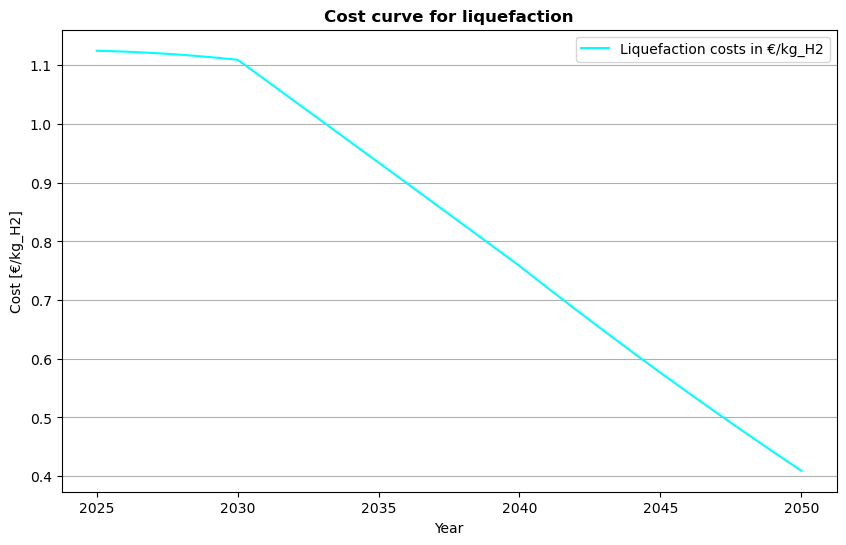

In [47]:
# Plot cost curve for liquefaction
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'cyan', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for liquefaction', fontweight = 'bold')
plt.legend(['Liquefaction costs in €/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost [€/kg_H2]')
plt.show()

## Export terminal

In [48]:
# Lifetime of import and export terminals
l_ter = float(tea_lh2.loc['Export Terminal - Technical lifetime [Years]']['LH2'])

In [49]:
# Amortisation factor for the export terminal
alpha_et = (i_tra * (1 + i_tra) ** l_ter) / (((1 + i_tra) ** l_ter) - 1)

In [50]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])

In [51]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lh2.loc['Export Terminal - Electricity use [kWh/kgH2]']['LH2'])
el_et

0.61

In [52]:
# Boil-off hydrogen in [%/day]
bog_et = float(tea_lh2.loc['Export Terminal - Boil off rate [%/day]']['LH2'])
bog_et

0.001

In [53]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])
t_et

7.0

In [54]:
el_reliq = float(tea_lh2.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

0.1

In [55]:
opex_et_share =  float(tea_lh2.loc['Export Terminal - Annual OPEX [% of CAPEX]']['LH2'])
opex_et_share

0.04

Calc. export terminal cost

Boil-off and transfer gas are re-liquefied @

Time relevant variables = capex [$/tpa], opex [$/tpa], electricity use [kwh/kg H2], electricity price [$/MWh] storage time in days

In [56]:
# Definition of the cost calculation function for the Export terminal.
def calculate_export_terminal_costs(alpha_et, capex_et_y, opex_et_y, el_et, p_el_y, el_reliq):
    result = (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * t_et) * p_el_y* 0.89/1000

    return result

In [57]:
#Calculation of export terminal costs [$/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Export_terminal_costs'])
result.index.name = 'Years'

In [60]:
for year in years:
    # get capex, opex, xx
    capex_et_y = float(tea_lh2.loc['Export Terminal - CAPEX/tank [€/t/a]'][year])
    opex_et_y = capex_et_y * opex_et_share
    p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])


    # calculate costs of specific year
    result.LH2_Export_terminal_costs.loc[year] = calculate_export_terminal_costs(alpha_et=alpha_et, capex_et_y=capex_et_y,
                                                              opex_et_y=opex_et_y, el_et=el_et, p_el_y=p_el_y, el_reliq=el_reliq)

result

,LH2_Export_terminal_costs
Years,
2025,0.195663
2026,0.199162
2027,0.202662
2028,0.206162
2029,0.209662
2030,0.213162
2031,0.209728
2032,0.206293
2033,0.202859


In [61]:
LH2_Export_terminal_costs =result

In [59]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Export_terminal_costs.csv')
result.to_csv(output_file, sep=';')

Plot export terminal costs

In [ ]:
# Plot cost curve for export terminal costs
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Export terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Export terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

## Shipping

In [63]:
# Technical lifetime of ships in years
l_ship = float(tea_lh2.loc['Shipping - Technical Lifetime [Years]']['LH2'])
l_ship

30.0

In [64]:
# Amortisation factor for shipping
alpha_ship = (i_tra * (1 + i_tra) ** l_ship) / (((1 + i_tra) ** l_ship) - 1)
alpha_ship


0.06505143508027657

In [65]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['sea distance (km)'].values)
d_sea

602.403

In [66]:
# Ship speed in [km/h]
v_ship = float(tea_lh2.loc['Shipping - Ship speed [km/h]']['LH2'])
v_ship

30.0

In [67]:
# Berthing time (time for unloading and loading in a harbour) in [h]
h_ship = float(tea_lh2.loc['Shipping - Berthing time [hours]']['LH2'])
h_ship


48.0

In [68]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lh2.loc['Shipping - Boil off opt. [%/day]']['LH2'])/24
bog_ship

8.333333333333333e-05

In [69]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lh2.loc['Shipping - Fuel use [kg H2/t/km]']['LH2'])/1000
f_ship

1.1265151515151516e-06

In [70]:
opex_ship_share = float(tea_lh2.loc['Shipping - Annual OPEX [% of CAPEX]']['LH2'])
opex_ship_share

0.04

Fuel cost calculation

In [85]:
# Cost of transported hydrogen in [$/kg_h2] in year y
LCOH_min = pd.read_csv(r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\processed\Minimal_production_costs.csv', delimiter=';',index_col=0, decimal=',')
LCOH_min

,Minimal_production_costs
Years,
2025,2.491992405919429
2026,2.373446744054794
2027,2.155720174849315
2028,1.821651889643836
2029,1.831195888438356
2030,1.839386671232877
2031,1.856516763082192
2032,1.872222648339041
2033,1.886501533333048


In [90]:
# Cost of transported hydrogen carrier in [€/kg_h2] in year y
H2_costs = (LCOH_min.loc[::]['Minimal_production_costs']).apply(pd.to_numeric)
Con_costs = (LH2_Liquefaction_costs.loc[::]['LH2_Liquefaction_costs']).apply(pd.to_numeric)
ET_costs =  (LH2_Export_terminal_costs.loc[::]['LH2_Export_terminal_costs']).apply(pd.to_numeric)

In [91]:
# €/kg_H2
LH2_cargo_cost = (H2_costs + Con_costs + ET_costs).to_frame('LH2_cargo_cost')
LH2_cargo_cost

,LH2_cargo_cost
Years,
2025,3.812541
2026,3.695979
2027,3.479452
2028,3.145801
2029,3.154979
2030,3.162021
2031,3.140754
2032,3.118028
2033,3.093838


Calc. shipping costs @ 10.000km

In [213]:
d_sea = 100

Definition of the cost calculation function for the maritime shipping.
 [%]
d_sea [km]
v_ship [km/h]
h_ship [h] berthing time
bog_ship [%/day]
f_ship [kg/kg/km]] Fuel use
Time relevant variables:
capex [€/kg/a]
opex [€/kg/a]
lcoh in [€/kg_h2]

Fuel assumptions: outward journey - boil-off is used as fuel.
Return journey: Residual H2 is used as fuel.

In [220]:
def calculate_ship_costs():

    result = (alpha_ship * capex_ship_y + opex_ship_y) / (8760/(2*(d_sea/v_ship + h_ship)))\
             /(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea))\
             + (bog_ship * d_sea/v_ship + f_ship * d_sea) * lcoh

    return result

In [221]:
# Calculation of shipping costs [€/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Shipping_costs'])
result.index.name = 'Years'

for year in years:
    # get capex, opex, xx
    capex_ship_y = float(tea_lh2.loc['Shipping - Capex/Ship opt. [€/t/a]'][year])/1000
    opex_ship_y = capex_ship_y * opex_ship_share
    lcoh = float(LH2_cargo_cost.loc[year]['LH2_cargo_cost'])

    # calculate costs of specific year
    result.LH2_Shipping_costs.loc[year] = calculate_ship_costs()

result

,LH2_Shipping_costs
Years,
2025,0.171744
2026,0.163067
2027,0.154352
2028,0.14559
2029,0.136963
2030,0.128334
2031,0.119695
2032,0.111055
2033,0.102415


In [222]:
LH2_Shipping_costs = result

In [ ]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [95]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'LH2_Shipping_costs.csv')
result.to_csv(output_file, sep=';')

Plot shipping costs

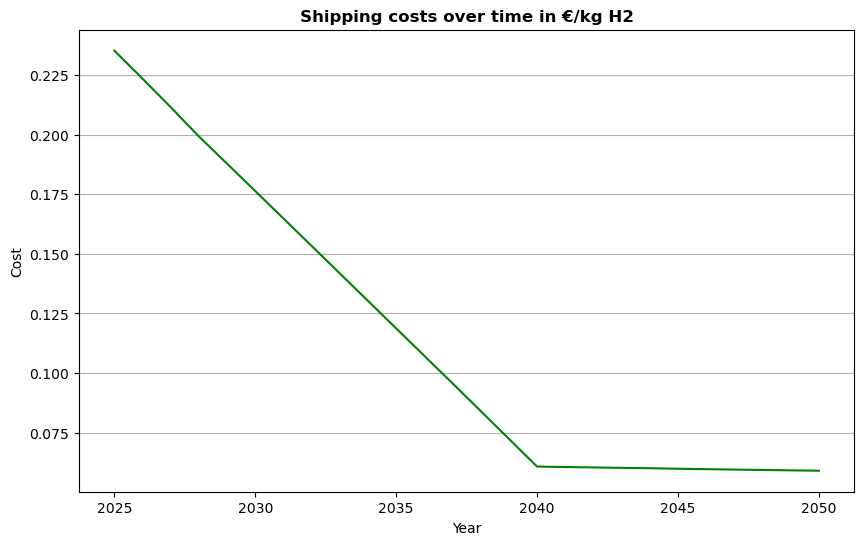

In [96]:
# Plot cost curve of hydrogen production from NGR with CCS
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Shipping costs over time in €/kg H2', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

## Import terminal

In [ ]:
# Definition of variables for the import terminal costs

In [97]:
# Amortisation factor for the import terminal
alpha_it = alpha_et

In [98]:
# Electricity consumption in kWh/kg H2
el_it = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_it

0.2

In [99]:
# Import terminal boil-off in [%/day]
bog_it = float(tea_lh2.loc['Import Terminal - Boil-off [%/day]']['LH2'])
bog_it

0.001

In [100]:
# Average storage time in the export terminal tanks in days
t_it = float(tea_lh2.loc['Import Terminal - Storage length per load [days]']['LH2'])
t_it

7.0

In [101]:
opex_it_share =  float(tea_lh2.loc['Import Terminal - Annual OPEX [% of Opex]']['LH2'])
opex_it_share

0.04

In [136]:
# Import terminal costs in [$/kg_h2]:
# Capex for the import terminal in [$/tpa]
# Opex for the import terminal in [$/tpa]
# Electricity consumption for the import terminal in [kWh/kg_h2]
# Price for electricity in importing country [$/MWh]
# Import terminal boil-off in [%/h]
# Berthing time in import terminal in [h]
# Cost of transported hydrogen in [$/kg_h2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Import_terminal_costs'])
result.index.name = 'Years'

def calculate_import_terminal_costs():
    result = (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * t_it) * p_el_y* 0.89/1000

    return result

In [137]:
for year in years:
    # get capex, opex, xx
    capex_it_y = float(tea_lh2.loc['Import Terminal - CAPEX [€/t/a]'][year])
    opex_it_y = capex_it_y * opex_it_share
    p_el_y = float(el_price.loc['Electricity prices in Germany [€_2020/MWh]'][year])


    # calculate costs of specific year
    result.LH2_Import_terminal_costs.loc[year] = calculate_import_terminal_costs()

result

,LH2_Import_terminal_costs
Years,
2025,0.273697
2026,0.258624
2027,0.243551
2028,0.228478
2029,0.213405
2030,0.198332
2031,0.193974
2032,0.189689
2033,0.185468


In [138]:
LH2_Import_terminal_costs = result

In [ ]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Import_terminal_costs.csv')
result.to_csv(output_file, sep=';')

Plot import terminal costs

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'red', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='red', linestyle='dashed')
plt.title('Import terminal costs over time', fontweight='bold', fontsize='large')
plt.legend(['Import terminal costs in €/kg_H2'])
plt.xlabel('Year', fontsize='large')
plt.ylabel('Cost [€/kg_H2]', fontsize='large')
plt.show()

## Reconversion

In [105]:
# Economic lifetime for the reconversion plant [years]
l_recon = float(tea_lh2.loc['Reconversion - Lifetime [Years]']['LH2'])
l_recon

30.0

In [106]:
# Amortisation factor alpha for the reconversion plant
alpha_recon =  (i_liq * (1 + i_liq) ** l_recon) /(((1 + i_liq) ** l_recon) - 1)
alpha_liq


0.06505143508027657

In [107]:
# Electricty consumption for the conversion in [kWh/kg_h2]
el_recon = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_recon

0.2

In [108]:
opex_recon_share = float(tea_lh2.loc['Reconversion - Opex opt. [% of Capex]']['LH2'])
opex_recon_share

0.03

In [141]:
def calculate_recon_costs(alpha_recon, capex_recon_y, opex_recon_y, el_recon_y, p_el_y):
    result = float(
        (alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + el_recon_y * p_el_y / 1000 * 0.89)
    return result


In [142]:
# Calculation of conversion costs [€/kg_h2] from 2030 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Reconversion_costs'])
result.index.name = 'Years'

In [143]:
for year in years:
    # get capex, opex, natural gas price and CO2 price of specific year
    capex_recon_y = float(tea_lh2.loc['Reconversion - Capex opt. [€/t/a]'][year])
    opex_recon_y = capex_recon_y * opex_recon_share
    el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    p_el_y = float(el_price.loc['Electricity prices in Germany [€_2020/MWh]'][year])

    # calculate costs of specific year
    result.LH2_Reconversion_costs.loc[year] = calculate_recon_costs(alpha_recon=alpha_recon, capex_recon_y=capex_recon_y,
                                                                opex_recon_y=opex_recon_y, el_recon_y=el_recon_y,
                                                                p_el_y=p_el_y)
result

,LH2_Reconversion_costs
Years,
2025,0.255359
2026,0.235161
2027,0.215561
2028,0.19656
2029,0.178156
2030,0.16035
2031,0.15135
2032,0.142427
2033,0.133572


In [144]:
LH2_Reconversion_costs = result

In [ ]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Reconversion_costs.csv')
result.to_csv(output_file, sep=';')

## Total LH2 transport costs

In [145]:
liq_costs = LH2_Liquefaction_costs
et_costs = LH2_Export_terminal_costs
ship_costs = LH2_Shipping_costs
it_costs = LH2_Import_terminal_costs
recon_costs = LH2_Reconversion_costs

In [134]:
it_costs

,LH2_Import_terminal_costs
Years,
2025,NaN
2026,NaN
2027,NaN
2028,NaN
2029,NaN
2030,NaN
2031,NaN
2032,NaN
2033,NaN


In [146]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_transport_costs'])
result.index.name = 'Years'

In [147]:
# Calculate total transport costs from liquefaction costs (LC), export terminal costs (EC), Shipping costs (SC), import terminal costs (IC)
def calculate_seaborne_transport_costs():
    result = LC + EC + SC + IC + RC

    return result

In [148]:
for year in years:
    # get all costs
    LC = float(liq_costs.loc[year]['LH2_Liquefaction_costs'])
    EC = float(et_costs.loc[ year]['LH2_Export_terminal_costs'])
    SC = float(ship_costs.loc[year]['LH2_Shipping_costs'])
    IC = float(it_costs.loc[year]['LH2_Import_terminal_costs'])
    RC = float(recon_costs.loc[year]['LH2_Reconversion_costs'])
    # calculate costs of specific year
    result.LH2_transport_costs.loc[year] = calculate_seaborne_transport_costs()

result

,LH2_transport_costs
Years,
2025,2.084814
2026,2.039783
2027,1.994332
2028,1.948421
2029,1.90313
2030,1.857649
2031,1.794376
2032,1.731212
2033,1.668142


In [150]:
LH2_transport_costs =result

In [151]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

C:\Users\REUTER\AppData\Local\Temp\ipykernel_11440\986526507.py:4: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = book


AttributeError: can't set attribute 'sheets'

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'LH2_transport_costs.csv')
result.to_csv(output_file, sep=';')

In [ ]:
# Plot cost curve for seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for LH2 shipping [€/kg H2]', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

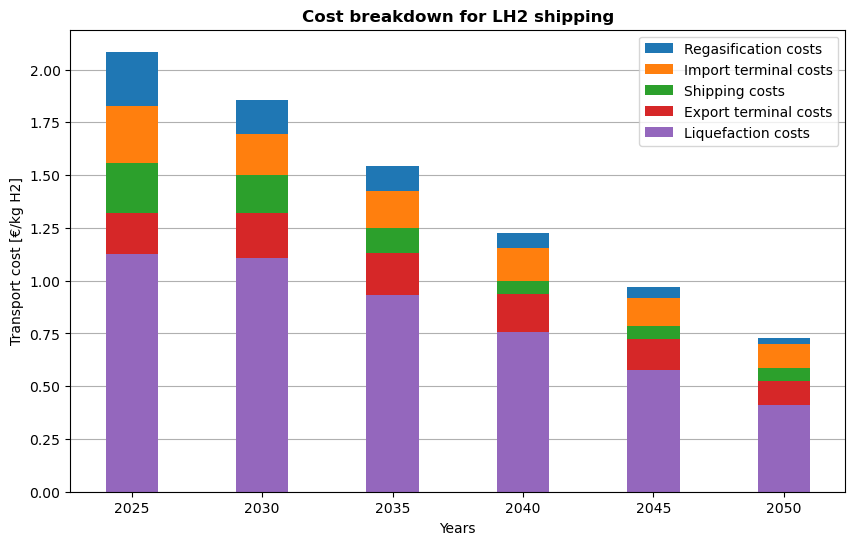

In [152]:
# Cost breakdown for LH2 shipping
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
LC = (liq_costs.loc[::5]['LH2_Liquefaction_costs']).apply(pd.to_numeric)
EC = (et_costs.loc[::5]['LH2_Export_terminal_costs']).apply(pd.to_numeric)
SC = (ship_costs.loc[::5]['LH2_Shipping_costs']).apply(pd.to_numeric)
IC = (it_costs.loc[::5]['LH2_Import_terminal_costs']).apply(pd.to_numeric)
RC = (recon_costs.loc[::5]['LH2_Reconversion_costs']).apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence

RC_plt = plt.bar(x,RC, width, label='Regasification costs', bottom= LC + EC + SC + IC)
IC_plt = plt.bar(x,IC, width, label='Import terminal costs', bottom= LC + EC + SC)
SC_plt = plt.bar(x,SC, width, label='Shipping costs', bottom= LC + EC)
EC_plt = plt.bar(x,EC, width, label='Export terminal costs', bottom= LC)
LC_plt = plt.bar(x,LC, width, label='Liquefaction costs')

plt.title('Cost breakdown for LH2 shipping', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Transport cost [€/kg H2]')
plt.xlabel('Years')
plt.show()

## Sensitivity

In [268]:
year = 2030
el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
capex_liq_y = float(tea_lh2.loc['Liquefaction - Capex opt. [€/t/a]'][year])
opex_liq_y = capex_liq_y * opex_liq_share
el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
capex_et_y = float(tea_lh2.loc['Export Terminal - CAPEX/tank [€/t/a]'][year])
opex_et_y = capex_et_y * opex_et_share
capex_it_y = float(tea_lh2.loc['Import Terminal - CAPEX [€/t/a]'][year])
opex_it_y = capex_it_y * opex_it_share
capex_ship_y = float(tea_lh2.loc['Shipping - Capex/Ship opt. [€/t/a]'][year])/1000
opex_ship_y = capex_ship_y * opex_ship_share
lcoh = float(LH2_cargo_cost.loc[year]['LH2_cargo_cost'])
capex_recon_y = float(tea_lh2.loc['Reconversion - Capex opt. [€/t/a]'][year])
opex_recon_y = capex_recon_y * opex_recon_share
el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])

p_el_y = float(el_price.loc['Electricity prices in Norway [€_2021/MWh]'][year])

### Electricity price sensi

In [401]:
sensitivity = []

def lh2_transport_sensi(p_el_y, alpha_liq, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_liq_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y):

    for x in range (21):
        factor = x/10
        result = \
        ((alpha_liq * capex_liq_y/1000 + opex_liq_y/1000) + el_liq_y * p_el_y/1000 * factor)                                 # Liquefaction
        + (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * t_et) * p_el_y/1000 * factor                  # Export terminal
        + (alpha_ship * capex_ship_y + opex_ship_y) / (8760/(2*(d_sea/v_ship + h_ship)))/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) + (bog_ship * d_sea/v_ship + f_ship * d_sea) * lcoh # Shipping
        + (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * t_it) * p_el_y/1000 * factor                  # Import terminal
        + (alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + el_recon_y * p_el_y / 1000 * factor                # Reconversion

        sensitivity.append(result)

    return sensitivity

In [403]:
lh2_transport_sensi(p_el_y, alpha_liq, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_liq_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y)

[0.7036323773570398,
 0.7492323773570397,
 0.7948323773570398,
 0.8404323773570398,
 0.8860323773570398,
 0.9316323773570397,
 0.9772323773570397,
 1.0228323773570398,
 1.0684323773570399,
 1.1140323773570397,
 1.1596323773570398,
 1.20523237735704,
 1.2508323773570398,
 1.2964323773570396,
 1.3420323773570397,
 1.3876323773570398,
 1.4332323773570397,
 1.4788323773570398,
 1.5244323773570398,
 1.5700323773570397,
 1.6156323773570398]

In [404]:
lh2_transport_sensi_P_el= pd.DataFrame(sensitivity, range(21), columns=['LH2 transport costs [€/kg H2]'])
lh2_transport_sensi_P_el.index.name = 'Electricity price change'
lh2_transport_sensi_P_el

,LH2 transport costs [€/kg H2]
Electricity price change,
0,0.703632
1,0.749232
2,0.794832
3,0.840432
4,0.886032
5,0.931632
6,0.977232
7,1.022832
8,1.068432


In [405]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'lh2_transport_sensi_P_el.csv')
lh2_transport_sensi_P_el.to_csv(output_file, sep = ';')

### Transport distance sensi

In [243]:
transport_distance = np.arange(0,10001, 500)
sensitivity = []

def lh2_transport_d(p_el_y, alpha_liq, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_liq_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y):

    for d_sea in transport_distance:

        result = \
        ((alpha_liq * capex_liq_y/1000 + opex_liq_y/1000) + el_liq_y * p_el_y/1000)\
        + (alpha_et * capex_et_y/1000 + opex_et_y/1000) + (el_et + el_reliq * t_et) * p_el_y/1000\
        + (alpha_ship * capex_ship_y + opex_ship_y) / (8760/(2*(d_sea/v_ship + h_ship)))/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) + (bog_ship * d_sea/v_ship + f_ship * d_sea) * lcoh\
        + (alpha_it * capex_it_y/1000 + opex_it_y/1000) + (el_it + el_reliq * t_it) * p_el_y/1000\
        + (alpha_recon * capex_recon_y / 1000 + opex_recon_y / 1000) + el_recon_y * p_el_y / 1000\

        sensitivity.append(result)

    return sensitivity

In [244]:
lh2_transport_d(p_el_y, alpha_liq, alpha_et, alpha_ship, alpha_it, alpha_recon,capex_liq_y, capex_et_y,capex_ship_y, capex_it_y,  bog_ship, capex_recon_y, d_sea ,v_ship, f_ship, el_et ,el_it ,t_it ,el_recon_y)

[1.775206169204225,
 1.7925162215690553,
 1.8098785559614805,
 1.8272934803717529,
 1.8447613052140197,
 1.862282343350217,
 1.8798569101142426,
 1.897485323336422,
 1.9151679033682572,
 1.9329049731074794,
 1.9506968580233954,
 1.9685438861825382,
 1.9864463882746273,
 2.0044046976388374,
 2.02241915029039,
 2.040490084947456,
 2.058617843058393,
 2.076802768829307,
 2.0950452092519516,
 2.1133455141319635,
 2.131704036117445]

In [246]:
lh2_transport_sensi_distance= pd.DataFrame(sensitivity, transport_distance, columns=['LH2 transport costs [€/kg H2]'])
lh2_transport_sensi_distance.index.name = 'Transport distance in km'
lh2_transport_sensi_distance

,LH2 transport costs [€/kg H2]
Transport distance in km,
0,1.775206
500,1.792516
1000,1.809879
1500,1.827293
2000,1.844761
2500,1.862282
3000,1.879857
3500,1.897485
4000,1.915168


In [247]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'lh2_transport_sensi_distance.csv')
lh2_transport_sensi_distance.to_csv(output_file, sep = ';')

## Plots

### Electricity price sensi

In [406]:
lh2_transport_sensi_P_el

,LH2 transport costs [€/kg H2]
Electricity price change,
0,0.703632
1,0.749232
2,0.794832
3,0.840432
4,0.886032
5,0.931632
6,0.977232
7,1.022832
8,1.068432


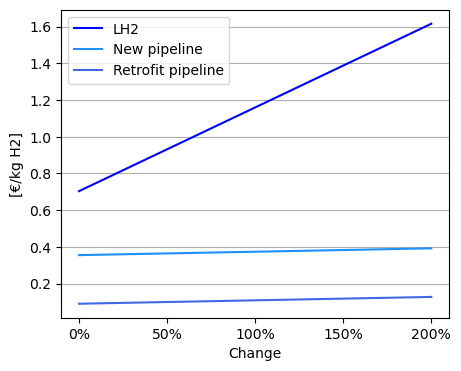

In [408]:
fig, ax = plt.subplots(figsize=(5,4))
#plt.subplot(1,2,1)


plt.plot(lh2_transport_sensi_P_el, color='blue', linestyle='solid', label = 'LH2')
plt.plot(new_pipe_sensi_P_el, color='dodgerblue',linestyle='-', label = 'New pipeline')
plt.plot(retro_pipe_sensi_P_el, color='royalblue',linestyle='-', label = 'Retrofit pipeline')
plt.grid(True, axis='y')
#plt.grid(True, axis='x')
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(10, decimals=None))
plt.locator_params(axis='x', nbins=5)
plt.ylabel('[€/kg H2]')
plt.xlabel('Change')
plt.legend()



title = 'LH2_EF_sensi'
#plt.savefig(path_plt + title + '.png', transparent=True)

plt.show()

### Transport distance sensi

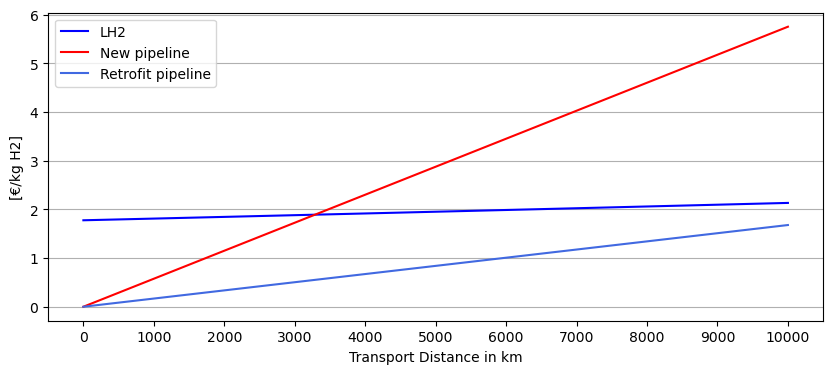

In [376]:
fig, ax = plt.subplots(figsize=(10,4))
#plt.subplot(1,2,1)


plt.plot(lh2_transport_sensi_distance, color='blue', linestyle='-', label = 'LH2')
plt.plot(new_pipe_sensi_distance, color='red',linestyle='-', label = 'New pipeline')
plt.plot(retro_pipe_sensi_distance, color='royalblue',linestyle='-', label = 'Retrofit pipeline')
plt.grid(True, axis='y')
#plt.grid(True, axis='x')
ax.set_axisbelow(True)
plt.locator_params(axis='x', nbins=12)
plt.ylabel('[€/kg H2]')
plt.xlabel('Transport Distance in km')
plt.legend()



title = 'LH2_EF_sensi'
#plt.savefig(path_plt + title + '.png', transparent=True)

plt.show()